In [ ]:
!wget https://www.dropbox.com/s/d6ix54bxb6m853w/COVID_NORMAL.zip?dl=0

--2020-11-17 17:42:07--  https://www.dropbox.com/s/d6ix54bxb6m853w/COVID_NORMAL.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/d6ix54bxb6m853w/COVID_NORMAL.zip [following]
--2020-11-17 17:42:07--  https://www.dropbox.com/s/raw/d6ix54bxb6m853w/COVID_NORMAL.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc69cfd37f0b3cc153af6da484ea.dl.dropboxusercontent.com/cd/0/inline/BDYQbC8BEyq5WN_A_yszbmm1VeeutPhcS67PeIdAAvsyNQhuxML_cnAhkIqMGhOsNd7cENcz8O_YfNDVA9oUFH6imBhyiYSP5ZsgSuU_CouDrY0PUPkmOPLqrE56MSyB-N0/file# [following]
--2020-11-17 17:42:07--  https://uc69cfd37f0b3cc153af6da484ea.dl.dropboxusercontent.com/cd/0/inline/BDYQbC8BEyq5WN_A_yszbmm1VeeutPhcS67PeIdAAvsyNQhuxML_cnAhkIqMGhOsNd7cENcz8O_YfNDVA9oUFH6imBhyiY

In [ ]:
!unzip 'COVID_NORMAL.zip?dl=0'

Archive:  COVID_NORMAL.zip?dl=0
   creating: COVID_NORMAL/test/
   creating: COVID_NORMAL/test/COVID/
  inflating: COVID_NORMAL/test/COVID/10.1016-slash-j.hrcr.2020.04.015-fig3-b.png  
  inflating: COVID_NORMAL/test/COVID/19abe1f3.jpg  
  inflating: COVID_NORMAL/test/COVID/1-s2.0-S1521661620303314-gr1_lrg-a.png  
  inflating: COVID_NORMAL/test/COVID/24035bda.jpg  
  inflating: COVID_NORMAL/test/COVID/3b46de94.jpg  
  inflating: COVID_NORMAL/test/COVID/50e51fcefaa760d0757eeae6eb0858_jumbo.jpeg  
  inflating: COVID_NORMAL/test/COVID/6b44464d-73a7-4cf3-bbb6-ffe7168300e3.annot.original.jpeg  
  inflating: COVID_NORMAL/test/COVID/7-fatal-covid19.jpg  
  inflating: COVID_NORMAL/test/COVID/ae6c954c0039de4b5edee53865ffee43-e6c8-0.jpg  
  inflating: COVID_NORMAL/test/COVID/ajr.20.23034.pdf-001.png  
  inflating: COVID_NORMAL/test/COVID/all14238-fig-0001-m-b.jpg  
  inflating: COVID_NORMAL/test/COVID/all14238-fig-0002-m-f.jpg  
  inflating: COVID_NORMAL/test/COVID/auntminnie-d-2020_01_28_23_51_6

In [ ]:
#import the libraries as shown below

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'COVID_NORMAL/train'
valid_path = 'COVID_NORMAL/Val'

In [ ]:
import keras as keras

In [ ]:
# Import the DenseNet121 library as shown below and add preprocessing layer to the front of DenseNet
# Here we will be using imagenet weights

dense = keras.applications.DenseNet121(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
# don't train existing weights
for layer in dense.layers:
    layer.trainable = False

In [ ]:
# useful for getting number of output classes
folders = glob('COVID_NORMAL/train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(dense.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=dense.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
_______________________________________________________________________________________

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('COVID_NORMAL/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1468 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('COVID_NORMAL/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 295 images belonging to 2 classes.


In [ ]:
import keras as keras
METRICS=[
    keras.metrics.Precision(), 
    keras.metrics.Recall(),
    'accuracy',
    keras.metrics.SensitivityAtSpecificity(0.9),
    keras.metrics.SpecificityAtSensitivity(0.9),
]
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=METRICS
)

In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/15
46/46 [==============================] - 49s 1s/step - loss: 0.0326 - precision_2: 0.9966 - recall_2: 0.9966 - accuracy: 0.9966 - sensitivity_at_specificity_2: 0.9973 - specificity_at_sensitivity_2: 0.9973 - val_loss: 0.0872 - val_precision_2: 0.9932 - val_recall_2: 0.9932 - val_accuracy: 0.9932 - val_sensitivity_at_specificity_2: 0.9932 - val_specificity_at_sensitivity_2: 0.9932
Epoch 2/15
46/46 [==============================] - 46s 990ms/step - loss: 0.0590 - precision_2: 0.9966 - recall_2: 0.9966 - accuracy: 0.9966 - sensitivity_at_specificity_2: 0.9973 - specificity_at_sensitivity_2: 0.9973 - val_loss: 0.0705 - val_precision_2: 0.9898 - val_recall_2: 0.9898 - val_accuracy: 0.9898 - val_sensitivity_at_specificity_2: 0.9932 - val_specificity_at_sensitivity_2: 0.9932
Epoch 3/15
46/46 [==============================] - 45s 988ms/step - loss: 0.0236 - precision_2: 0.9980 - recall_2: 0.9980 - accuracy: 0.9980 - sensitivity_at_specificity_2: 0.9980 - specificity_at_sensitivity

In [ ]:
import tensorflow as tf

from keras.models import load_model

model.save('model_DenseNet121_binary_classification.h5')

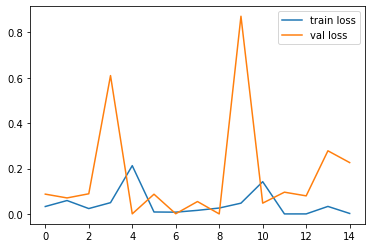

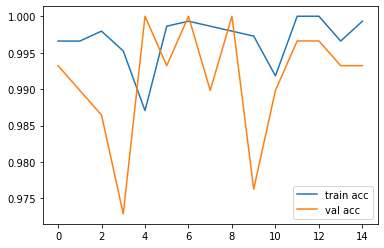

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
validation_datagen = ImageDataGenerator(rescale = 1./255)
# Make sure you provide the same target size as initialied for the image size
validation_set = train_datagen.flow_from_directory('COVID_NORMAL/Val',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
accuracy=model.evaluate(validation_set,batch_size=32,return_dict=True)
print(accuracy)

Found 74 images belonging to 2 classes.
3/3 [==============================] - 1s 425ms/step - loss: 0.0000e+00 - precision_2: 1.0000 - recall_2: 1.0000 - accuracy: 1.0000 - sensitivity_at_specificity_2: 1.0000 - specificity_at_sensitivity_2: 1.0000
{'loss': 0.0, 'precision_2': 1.0, 'recall_2': 1.0, 'accuracy': 1.0, 'sensitivity_at_specificity_2': 1.0, 'specificity_at_sensitivity_2': 1.0}


In [ ]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import os

# image folder
folder_path = 'Multiclass With Bacterial/DATA/Val/COVID'
# path to model
#model_path = 'kaggle_covid_dataset_vgg19.h5'
# dimensions of images
img_width, img_height = 224,224

# load the trained model
#model = load_model(model_path)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# load all images into a list
images = []
for img in os.listdir(folder_path):
    img = os.path.join(folder_path, img)
    img = image.load_img(img, target_size=(img_width, img_height))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img/=255.
    images.append(img)

# stack up images list to pass for prediction
images = np.vstack(images)
classes = model.predict(images, batch_size=1)
print(classes)

[[1.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00]
 [1.0000000e+00 2.0920925e-34]
 [1.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00]
 [1.0000000e+00 2.6352714e-23]
 [1.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00]
 [1.0000